# 2022 COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please check the bottom of the this ipynb file*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing

## 1.0. Data Collection [DO NOT MODIFY THIS]

In [ ]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id = '16g474hdNsaNx0_SnoKuqj2BuwSEGdnbt'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('training_data.csv')

id = '1-7hj0sF3Rc5G6POKdkpbDXm_Q6BWFDPU'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('testing_data.csv')

import pandas as pd
training_data = pd.read_csv("/content/training_data.csv")
testing_data = pd.read_csv("/content/testing_data.csv")

print("------------------------------------")
print("Size of training dataset: {0}".format(len(training_data)))
print("Size of testing dataset: {0}".format(len(testing_data)))
print("------------------------------------")

print("------------------------------------")
print("Sample Data")
print("LABEL: {0} / SENTENCE: {1}".format(training_data.iloc[-1,0], training_data.iloc[-1,1]))
print("------------------------------------")


------------------------------------
Size of training dataset: 7808
Size of testing dataset: 867
------------------------------------
------------------------------------
Sample Data
LABEL: F / SENTENCE: 'Half of it is going straight to charity, another quarter going straight to scientific research, an eighth to the parkour community, a sixteenth to towards spreading information about health and...|||Find a path or suffer more.|||http://personalitycafe.com/enneagram-personality-theory-forum/85323-enneagram-type-mbti-type-compared-statistics.html yep.|||I kind of anchor on Fi and Ne makes having Ni really fun. INFP for me as they tire me out less and our views tend to align more.|||The two ESTPs I have gotten the chance to know seem to experience much more than other people who have been on the planet for the same amount of time and are quite the renaissance (wo)men.  Is this...|||I don't really have a best friend ISTP(passion-amateur group co-founder), INTJ(intellectual and various sma

In [ ]:
import re
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import pprint
from sklearn.metrics import classification_report

In [ ]:
# Preview of the data in the csv file, which has two columns:
# (1)type - label of the post (2)posts - the corresponding post content
training_data.head()

,type,posts
0,F,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,T,'I'm finding the lack of me in these posts ver...
2,T,'Good one _____ https://www.youtube.com/wat...
3,T,"'Dear INTP, I enjoyed our conversation the o..."
4,T,'You're fired.|||That's another silly misconce...


In [ ]:
# Extract the labels and posts and store into List

# Get the list of training data (posts)
training_posts=training_data['posts'].tolist()
# Get the list of corresponding labels for the training data (posts)
training_labels=training_data['type'].tolist()

# Get the list of testing data (posts)
testing_posts=testing_data['posts'].tolist()
# Get the list of corresponding labels for the testing data (posts)
testing_labels=testing_data['type'].tolist()

## 1.1. URL Removal
*related to the section 4.2*

In [ ]:
# Please comment your code
#remove URL
training_posts_nourl = list(training_posts)
for i in range(len(training_posts)):
  training_posts_nourl[i] = re.sub(r'http\S+','', training_posts[i])

testing_posts_nourl = list(testing_posts)
for i in range(len(testing_posts)):
  testing_posts_nourl[i] = re.sub(r'http\S+','', testing_posts[i])

print(training_posts_nourl[0])
print(testing_posts_nourl[0])

' and intj moments    sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your life?|||     On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~    ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390     ...|||Welcome and stuff.|||  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types' cognitive functions and whatnot, when left by...|||All things in mod

## 1.2. Preprocess data (e.g. Stop words, Stemming)
*related to the section 4.2*

In [ ]:
# Please comment your code

#replace |||
def replace_vertical_line(x):
    x = str(x)
    x = x.replace('|||',' ')
    return x

#remove punctuation
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]',' ',x)
    return x

#lowercase and remove numbers
def lower_remove(x):
  tokens = re.sub(r"[0-9]+", " ", x.lower())
  return tokens

#remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
stop_words = sw.words()

def remove_stopword(sentence):
  tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in tokens if not w in stop_words]
  return filtered_sentence

#TweetTokenizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def tknzr_token(x):
  x = tknzr.tokenize(x)
  return x

#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stemming(x):
  singles = [stemmer.stem(plural) for plural in x]
  return singles

#Lemmatisation by NLTK Wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def Lemmatisation(x):
  singles = [lemmatizer.lemmatize(plural) for plural in x]
  return singles

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#training set preprocessing
training_posts_nourl_preprocess = list(training_posts_nourl)
for i in range(len(training_posts_nourl_preprocess)):
  training_posts_nourl_preprocess[i] = lower_remove(training_posts_nourl_preprocess[i])
  training_posts_nourl_preprocess[i] = remove_punctuation_re(training_posts_nourl_preprocess[i])
  training_posts_nourl_preprocess[i] = remove_stopword(training_posts_nourl_preprocess[i])
  #training_posts_nourl_preprocess[i] = stemming(training_posts_nourl_preprocess[i])
  training_posts_nourl_preprocess[i] = Lemmatisation(training_posts_nourl_preprocess[i])

#testing set preprocessing
testing_posts_nourl_preprocess = list(testing_posts_nourl)
for i in range(len(testing_posts_nourl_preprocess)):
  testing_posts_nourl_preprocess[i] = lower_remove(testing_posts_nourl_preprocess[i])
  testing_posts_nourl_preprocess[i] = remove_punctuation_re(testing_posts_nourl_preprocess[i])
  testing_posts_nourl_preprocess[i] = remove_stopword(testing_posts_nourl_preprocess[i])
  #testing_posts_nourl_preprocess[i] = stemming(testing_posts_nourl_preprocess[i])
  testing_posts_nourl_preprocess[i] = Lemmatisation(testing_posts_nourl_preprocess[i])


# 2 - Input Representation


## 2.1. Word Embedding Construction
*related to the section 4.1 and 4.3*


In [ ]:
# Please comment your code
from gensim.models import Word2Vec
import pprint
# sentence: iterable of iterables, i.e. the list of lists of tokens from our data
# size: dimensionality of the word vectors, window: window size, min_count: ignores all words with total frequency lower than the specified count value
# workers: Use specified number of worker threads to train the model (=faster training with multicore machines), sg: training algorithm, 0 for CBOW, 1 for skip-gram
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=5, workers=2, sg=0)

## 2.2. Pretrained Word Embedding
*related to the section 4.3*

In [ ]:
# Please comment your code
# download the model and return as object ready for use
pretrained_embedding_model = api.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
# Please comment your code
#create word list
word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)

#create word index
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

{'conservatists': 0, 'blastoisa': 1, 'indeed': 2, 'commemoration': 3, 'grandaaad': 4, 'xi': 5, 'megatuxracer': 6, 'cline': 7, 'hornblower': 8, 'midler': 9, 'honey': 10, 'expressively': 11, 'hella': 12, 'doyouevenliftbro': 13, 'synomously': 14, 'columbia': 15, 'dubstepy': 16, 'samantha_mt': 17, 'hazily': 18, 'verity': 19, 'extroverte': 20, 'hathaway': 21, 'imposed': 22, 'antagonized': 23, 'mure': 24, 'tribianni': 25, 'experienced': 26, 'supremes': 27, 'sympathetic': 28, 'shiro': 29, 'wö': 30, 'grook': 31, 'patriarchal': 32, 'taisuke': 33, 'macys': 34, 'berenstain': 35, 'indecisive': 36, 'typethisperson': 37, 'reece': 38, 'andnot': 39, 'hahahahahahahahahahahahaha': 40, 'dermatillomania': 41, 'upton': 42, 'ahaaaa': 43, 'transgender': 44, 'mignon': 45, 'lea': 46, 'retribution': 47, 'heeee': 48, 'condused': 49, 'sandlot': 50, 'janessalaboucan': 51, 'biostar': 52, 'embarrassing': 53, 'unhugging': 54, 'benadryl': 55, 'crapola': 56, 'sublimate': 57, 'jariah': 58, 'fussy': 59, 'rabble': 60, 'ba

In [ ]:
emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
        emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

# Convert the sentences to the word index that aligns with the lookup table
len_list = [len(s) for s in training_posts_nourl_preprocess]
seq_length = 150

# Padding and encoding
def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        elif len(temp_encoded) > seq_length:
            temp_encoded = temp_encoded[0:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)
print(sent_encoded)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 3 - Model Implementation

### 3.1. Build Sequence Model (Bi-directional model)
*related to the section 4.4*

In [ ]:
from sklearn.preprocessing import LabelEncoder
#training labels
lEnc = LabelEncoder()
lEnc.fit(training_labels)
label_encoded= lEnc.transform(training_labels)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 50

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

84333


### 3.2. Train Sequence Model (Bi-directional model)

*related to the section 4.4*

Note that it will not be marked if you do not display the Training Loss and the Number of Epochs in the Assignment 1 ipynb.


In [ ]:
# training model
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))

print('Finished Training')

torch.save(model,'best_model.pt')

#Testing
test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)

input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)

label_test_encoded= lEnc.transform(testing_labels)

outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

print(classification_report(label_test_encoded,predicted.cpu().numpy()))

Epoch: 5, loss: 0.67615, train_acc: 0.57
Epoch: 10, loss: 0.64407, train_acc: 0.63
Epoch: 15, loss: 0.58356, train_acc: 0.69
Epoch: 20, loss: 0.52774, train_acc: 0.74
Epoch: 25, loss: 0.46167, train_acc: 0.78
Epoch: 30, loss: 0.38542, train_acc: 0.83
Epoch: 35, loss: 0.32931, train_acc: 0.86
Epoch: 40, loss: 0.25228, train_acc: 0.91
Epoch: 45, loss: 0.19603, train_acc: 0.93
Epoch: 50, loss: 0.13559, train_acc: 0.96
Finished Training
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       467
           1       0.63      0.71      0.67       400

    accuracy                           0.68       867
   macro avg       0.68      0.68      0.68       867
weighted avg       0.68      0.68      0.68       867



# 4 - Evaluation


## 4.1. Word Embedding Evaluation
You are to apply Semantic-Syntactic word relationship tests for the trained word embeddings and visualise the result of Semantic-Syntactic word relationship tests.
Note that it will not be marked if you do not display it in the ipynb file.


Syntactic accuracy and total accuracy have been improve as dimensions increasing. Semantic accuracy are not benefit from dimension increasing. The reason could be that, higher dimension word2vector model contains more information than lower dimension word2vector model and easily distingush different meanings of words. However, Syntactic and total accuracy decrease when window size increasing. Because words have strong relation with their neighors but lower relation with the words far away.




In [ ]:
table = pd.DataFrame(data = np.array([['CBOW',50,5,5.72,12.69,11.33],['CBOW',100,5,6.37,12.47,12.08],
                ['CBOW',150,5,5.62,14.33,12.62],['CBOW',150,10,6.21,12.45,11.23],
                ['CBOW',150,15,5.56,11.40,10.26]]),columns = ['Model','Dimensions','Window size','Semantic(%)','Syntactic(%)','Total(%)'])
table

,Model,Dimensions,Window size,Semantic,Syntactic,Total
0,CBOW,50,5,5.72,12.69,11.33
1,CBOW,100,5,6.37,12.47,12.08
2,CBOW,150,5,5.62,14.33,12.62
3,CBOW,150,10,6.21,12.45,11.23
4,CBOW,150,15,5.56,11.4,10.26


In [ ]:
# Please comment your code
#training set preprocessing
training_posts_4_1 = list(training_posts_nourl)
for i in range(len(training_posts_4_1)):
  training_posts_4_1[i] = lower_remove(training_posts_4_1[i])
  training_posts_4_1[i] = remove_punctuation_re(training_posts_4_1[i])
  training_posts_4_1[i] = remove_stopword(training_posts_4_1[i])
  #training_posts_4_1[i] = stemming(training_posts_4_1[i])
  training_posts_4_1[i] = Lemmatisation(training_posts_4_1[i])

#testing set preprocessing
testing_posts_4_1 = list(testing_posts_nourl)
for i in range(len(testing_posts_4_1)):
  testing_posts_4_1[i] = lower_remove(testing_posts_4_1[i])
  testing_posts_4_1[i] = remove_punctuation_re(testing_posts_4_1[i])
  testing_posts_4_1[i] = remove_stopword(testing_posts_4_1[i])
  #testing_posts_4_1[i] = stemming(testing_posts_4_1[i])
  testing_posts_4_1[i] = Lemmatisation(testing_posts_4_1[i])


In [ ]:
def evaluate_vectors(W, vocab, prefix='./eval/question-data/'):
    """Evaluate the trained word vectors on a variety of tasks"""

    filenames = [
        'capital-common-countries.txt', 'capital-world.txt', 'currency.txt',
        'city-in-state.txt', 'family.txt', 'gram1-adjective-to-adverb.txt',
        'gram2-opposite.txt', 'gram3-comparative.txt', 'gram4-superlative.txt',
        'gram5-present-participle.txt', 'gram6-nationality-adjective.txt',
        'gram7-past-tense.txt', 'gram8-plural.txt', 'gram9-plural-verbs.txt',
        ]

    # to avoid memory overflow, could be increased/decreased
    # depending on system and vocab size
    split_size = 100

    correct_sem = 0; # count correct semantic questions
    correct_syn = 0; # count correct syntactic questions
    correct_tot = 0 # count correct questions
    count_sem = 0; # count all semantic questions
    count_syn = 0; # count all syntactic questions
    count_tot = 0 # count all questions
    full_count = 0 # count all questions, including those with unknown words

    for i in range(len(filenames)):
        with open('%s/%s' % (prefix, filenames[i]), 'r') as f:
            full_data = [line.rstrip().split(' ') for line in f]
            full_count += len(full_data)
            data = [x for x in full_data if all(word in vocab for word in x)]

        if len(data) == 0:
            print("ERROR: no lines of vocab kept for %s !" % filenames[i])
            print("Example missing line:", full_data[0])
            continue

        indices = np.array([[vocab[word] for word in row] for row in data])
        ind1, ind2, ind3, ind4 = indices.T

        predictions = np.zeros((len(indices),))
        num_iter = int(np.ceil(len(indices) / float(split_size)))
        for j in range(num_iter):
            subset = np.arange(j*split_size, min((j + 1)*split_size, len(ind1)))

            pred_vec = (W[ind2[subset], :] - W[ind1[subset], :]
                +  W[ind3[subset], :])

            #cosine similarity if input W has been normalized
            dist = np.dot(W, pred_vec.T)


            for k in range(len(subset)):
                dist[ind1[subset[k]], k] = -np.Inf
                dist[ind2[subset[k]], k] = -np.Inf
                dist[ind3[subset[k]], k] = -np.Inf

            # predicted word index
            predictions[subset] = np.argmax(dist, 0).flatten()


        val = (ind4 == predictions) # correct predictions
        count_tot = count_tot + len(ind1)
        correct_tot = correct_tot + sum(val)
        if i < 5:
            count_sem = count_sem + len(ind1)
            correct_sem = correct_sem + sum(val)
        else:
            count_syn = count_syn + len(ind1)
            correct_syn = correct_syn + sum(val)

        print("%s:" % filenames[i])
        print('ACCURACY TOP1: %.2f%% (%d/%d)' %
            (np.mean(val) * 100, np.sum(val), len(val)))

    return correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count


In [ ]:
#4.1.1  w2v cbow, dimension=50,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_4_1, size=50, window=5, min_count=2, workers=2, sg=0)
wv_cbow_model.wv.save_word2vec_format('wv_cbow_w2v_4_1_1.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git

vectors_file="/content/wv_cbow_w2v_4_1_1.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

fatal: destination path 'GloVe' already exists and is not an empty directory.
Vocab size:  43395


In [ ]:
correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

Semantic_4_1_1 = correct_sem / float(count_sem)
Syntactic_4_1_1 = correct_syn / float(count_syn)
Total_4_1_1 = correct_tot / float(count_tot)

print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

capital-common-countries.txt:
ACCURACY TOP1: 2.05% (7/342)
capital-world.txt:
ACCURACY TOP1: 1.52% (5/329)
currency.txt:
ACCURACY TOP1: 0.00% (0/54)
city-in-state.txt:
ACCURACY TOP1: 0.57% (5/872)
family.txt:
ACCURACY TOP1: 33.09% (90/272)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 2.15% (20/930)
gram2-opposite.txt:
ACCURACY TOP1: 4.00% (26/650)
gram3-comparative.txt:
ACCURACY TOP1: 12.39% (165/1332)
gram4-superlative.txt:
ACCURACY TOP1: 6.63% (70/1056)
gram5-present-participle.txt:
ACCURACY TOP1: 34.19% (318/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 4.11% (45/1094)
gram7-past-tense.txt:
ACCURACY TOP1: 20.96% (327/1560)
ERROR: no lines of vocab kept for gram8-plural.txt !
Example missing line: ['banana', 'bananas', 'bird', 'birds']
gram9-plural-verbs.txt:
ACCURACY TOP1: 3.03% (4/132)
Questions seen/total: 48.88% (9553/19544)
Semantic accuracy: 5.72%  (107/1869)
Syntactic accuracy: 12.69%  (975/7684)
Total accuracy: 11.33%  (1082/9553)


In [ ]:
#4.1.2  w2v cbow, dimension=100,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_4_1, size=100, window=5, min_count=2, workers=2, sg=0)
wv_cbow_model.wv.save_word2vec_format('wv_cbow_w2v_4_1_2.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git

vectors_file="/content/wv_cbow_w2v_4_1_2.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

Semantic_4_1_2 = correct_sem / float(count_sem)
Syntactic_4_1_2 = correct_syn / float(count_syn)
Total_4_1_2 = correct_tot / float(count_tot)

print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

fatal: destination path 'GloVe' already exists and is not an empty directory.
Vocab size:  43395
capital-common-countries.txt:
ACCURACY TOP1: 1.17% (4/342)
capital-world.txt:
ACCURACY TOP1: 0.91% (3/329)
currency.txt:
ACCURACY TOP1: 0.00% (0/54)
city-in-state.txt:
ACCURACY TOP1: 1.49% (13/872)
family.txt:
ACCURACY TOP1: 36.40% (99/272)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 2.80% (26/930)
gram2-opposite.txt:
ACCURACY TOP1: 6.00% (39/650)
gram3-comparative.txt:
ACCURACY TOP1: 14.19% (189/1332)
gram4-superlative.txt:
ACCURACY TOP1: 7.95% (84/1056)
gram5-present-participle.txt:
ACCURACY TOP1: 37.63% (350/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 2.65% (29/1094)
gram7-past-tense.txt:
ACCURACY TOP1: 20.26% (316/1560)
ERROR: no lines of vocab kept for gram8-plural.txt !
Example missing line: ['banana', 'bananas', 'bird', 'birds']
gram9-plural-verbs.txt:
ACCURACY TOP1: 1.52% (2/132)
Questions seen/total: 48.88% (9553/19544)
Semantic accuracy: 6.37%  (119/1869)
Syntactic accu

In [ ]:
#4.1.3  w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_4_1, size=150, window=5, min_count=2, workers=2, sg=0)
wv_cbow_model.wv.save_word2vec_format('wv_cbow_w2v_4_1_3.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git

vectors_file="/content/wv_cbow_w2v_4_1_3.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

Semantic_4_1_3 = correct_sem / float(count_sem)
Syntactic_4_1_3 = correct_syn / float(count_syn)
Total_4_1_3 = correct_tot / float(count_tot)

print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

fatal: destination path 'GloVe' already exists and is not an empty directory.
Vocab size:  43395
capital-common-countries.txt:
ACCURACY TOP1: 1.46% (5/342)
capital-world.txt:
ACCURACY TOP1: 0.91% (3/329)
currency.txt:
ACCURACY TOP1: 0.00% (0/54)
city-in-state.txt:
ACCURACY TOP1: 1.03% (9/872)
family.txt:
ACCURACY TOP1: 32.35% (88/272)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 3.01% (28/930)
gram2-opposite.txt:
ACCURACY TOP1: 4.92% (32/650)
gram3-comparative.txt:
ACCURACY TOP1: 18.92% (252/1332)
gram4-superlative.txt:
ACCURACY TOP1: 6.53% (69/1056)
gram5-present-participle.txt:
ACCURACY TOP1: 38.82% (361/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 2.29% (25/1094)
gram7-past-tense.txt:
ACCURACY TOP1: 21.09% (329/1560)
ERROR: no lines of vocab kept for gram8-plural.txt !
Example missing line: ['banana', 'bananas', 'bird', 'birds']
gram9-plural-verbs.txt:
ACCURACY TOP1: 3.79% (5/132)
Questions seen/total: 48.88% (9553/19544)
Semantic accuracy: 5.62%  (105/1869)
Syntactic accur

In [ ]:
#4.1.4  w2v cbow, dimension=150,window size=10
wv_cbow_model = Word2Vec(sentences=training_posts_4_1, size=150, window=10, min_count=2, workers=2, sg=0)
wv_cbow_model.wv.save_word2vec_format('wv_cbow_w2v_4_1_4.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git

vectors_file="/content/wv_cbow_w2v_4_1_4.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

Semantic_4_1_4 = correct_sem / float(count_sem)
Syntactic_4_1_4 = correct_syn / float(count_syn)
Total_4_1_4 = correct_tot / float(count_tot)

print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

fatal: destination path 'GloVe' already exists and is not an empty directory.
Vocab size:  43395
capital-common-countries.txt:
ACCURACY TOP1: 3.22% (11/342)
capital-world.txt:
ACCURACY TOP1: 1.82% (6/329)
currency.txt:
ACCURACY TOP1: 0.00% (0/54)
city-in-state.txt:
ACCURACY TOP1: 0.80% (7/872)
family.txt:
ACCURACY TOP1: 33.82% (92/272)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 2.37% (22/930)
gram2-opposite.txt:
ACCURACY TOP1: 4.92% (32/650)
gram3-comparative.txt:
ACCURACY TOP1: 13.59% (181/1332)
gram4-superlative.txt:
ACCURACY TOP1: 5.40% (57/1056)
gram5-present-participle.txt:
ACCURACY TOP1: 35.48% (330/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 4.75% (52/1094)
gram7-past-tense.txt:
ACCURACY TOP1: 17.95% (280/1560)
ERROR: no lines of vocab kept for gram8-plural.txt !
Example missing line: ['banana', 'bananas', 'bird', 'birds']
gram9-plural-verbs.txt:
ACCURACY TOP1: 2.27% (3/132)
Questions seen/total: 48.88% (9553/19544)
Semantic accuracy: 6.21%  (116/1869)
Syntactic accu

In [ ]:
#4.1.5  w2v cbow, dimension=150,window size=15
wv_cbow_model = Word2Vec(sentences=training_posts_4_1, size=150, window=15, min_count=2, workers=2, sg=0)
wv_cbow_model.wv.save_word2vec_format('wv_cbow_w2v_4_1_5.txt', binary=False)

!git clone https://github.com/stanfordnlp/GloVe.git

vectors_file="/content/wv_cbow_w2v_4_1_5.txt"

with open(vectors_file, 'r') as f:
  vectors = {}
  for line in f.readlines()[1:]: # we only need the embedding vectors starting from the second line
    vals = line.rstrip().split(' ')
    vectors[vals[0]] = [float(x) for x in vals[1:]]

vocab_words=list(vectors.keys())
vocab_size = len(vocab_words)
print("Vocab size: ",str(vocab_size))

# create word->index and index->word converter
vocab = {w: idx for idx, w in enumerate(vocab_words)}
ivocab = {idx: w for idx, w in enumerate(vocab_words)}

# create the embedding matrix of shape (vocab_size, dim)
vector_dim = len(vectors[ivocab[0]])
W = np.zeros((vocab_size, vector_dim))
for word, v in vectors.items():
    if word == '<unk>':
        continue
    W[vocab[word], :] = v

# normalize each word vector to unit length
# Vectors are usually normalized to unit length before they are used for similarity calculation, making cosine similarity and dot-product equivalent.
W_norm = np.zeros(W.shape)
d = (np.sum(W ** 2, 1) ** (0.5))
W_norm = (W.T / d).T

correct_sem, correct_syn, correct_tot, count_sem, count_syn, count_tot, full_count = evaluate_vectors(W_norm, vocab, prefix='/content/GloVe/eval/question-data')

Semantic_4_1_5 = correct_sem / float(count_sem)
Syntactic_4_1_5 = correct_syn / float(count_syn)
Total_4_1_5 = correct_tot / float(count_tot)

print('Questions seen/total: %.2f%% (%d/%d)' %
    (100 * count_tot / float(full_count), count_tot, full_count))
print('Semantic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_sem / float(count_sem), correct_sem, count_sem))
print('Syntactic accuracy: %.2f%%  (%i/%i)' %
    (100 * correct_syn / float(count_syn), correct_syn, count_syn))
print('Total accuracy: %.2f%%  (%i/%i)' % (100 * correct_tot / float(count_tot), correct_tot, count_tot))

fatal: destination path 'GloVe' already exists and is not an empty directory.
Vocab size:  43395
capital-common-countries.txt:
ACCURACY TOP1: 2.34% (8/342)
capital-world.txt:
ACCURACY TOP1: 0.30% (1/329)
currency.txt:
ACCURACY TOP1: 0.00% (0/54)
city-in-state.txt:
ACCURACY TOP1: 0.69% (6/872)
family.txt:
ACCURACY TOP1: 32.72% (89/272)
gram1-adjective-to-adverb.txt:
ACCURACY TOP1: 1.83% (17/930)
gram2-opposite.txt:
ACCURACY TOP1: 4.31% (28/650)
gram3-comparative.txt:
ACCURACY TOP1: 12.84% (171/1332)
gram4-superlative.txt:
ACCURACY TOP1: 3.88% (41/1056)
gram5-present-participle.txt:
ACCURACY TOP1: 31.83% (296/930)
gram6-nationality-adjective.txt:
ACCURACY TOP1: 4.30% (47/1094)
gram7-past-tense.txt:
ACCURACY TOP1: 17.50% (273/1560)
ERROR: no lines of vocab kept for gram8-plural.txt !
Example missing line: ['banana', 'bananas', 'bird', 'birds']
gram9-plural-verbs.txt:
ACCURACY TOP1: 2.27% (3/132)
Questions seen/total: 48.88% (9553/19544)
Semantic accuracy: 5.56%  (104/1869)
Syntactic accur

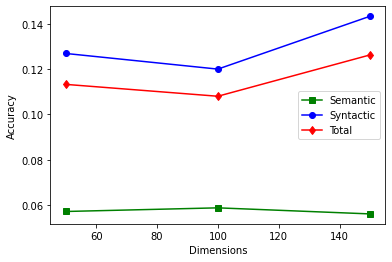

In [ ]:
#plo chart
#dimension: 4.1.1, 4.1.2, 4.1.3    window size: 4.1.3, 4.1.4, 4.1.5
Semantic_dim_list = np.array([Semantic_4_1_1,Semantic_4_1_2,Semantic_4_1_3])
Syntactic_dim_list = np.array([Syntactic_4_1_1,Syntactic_4_1_2,Syntactic_4_1_3])
Total_dim_list = np.array([Total_4_1_1,Total_4_1_2,Total_4_1_3])
Semantic_window_list = np.array([Semantic_4_1_3,Semantic_4_1_4,Semantic_4_1_5])
Syntactic_window_list = np.array([Syntactic_4_1_3,Syntactic_4_1_4,Syntactic_4_1_5])
Total_window_list = np.array([Total_4_1_3,Total_4_1_4,Total_4_1_5])

#model with different dimensions
ax1 = plt.figure()
axis = np.array([50,100,150])
plt.errorbar(axis,Semantic_dim_list,marker='s',label='Semantic',color='green')
plt.errorbar(axis,Syntactic_dim_list,marker='o',label='Syntactic',color='blue')
plt.errorbar(axis,Total_dim_list,marker='d',label='Total',color='red')
plt.ylabel('Accuracy')
plt.xlabel('Dimensions')
plt.legend(loc=5)

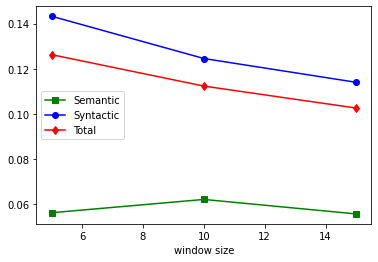

In [ ]:
#model with different window size
ax2 = plt.figure()
axis2 = np.array([5,10,15])
plt.errorbar(axis2,Semantic_window_list,marker='s',label='Semantic',color='green')
plt.errorbar(axis2,Syntactic_window_list,marker='o',label='Syntactic',color='blue')
plt.errorbar(axis2,Total_window_list,marker='d',label='Total',color='red')
plt.ylabel('Accuracy')
plt.xlabel('window size')
plt.legend(loc=6)

## 4.2. Performance Evaluation with Data Processing Techiques


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


In [ ]:
f1score_table_4_2 = pd.DataFrame(data = np.array([['Bi-LSTM With URL',0.69],['Bi-LSTM Without URL',0.70],
                ['Bi-LSTM with stemming',0.55],['Bi-LSTM with stopword and lemmasation',0.68]
                ]),columns = ['Model','F1 Score'])
f1score_table_4_2

,Model,F1 Score
0,Bi-LSTM With URL,0.69
1,Bi-LSTM Without URL,0.7
2,Bi-LSTM with stemming,0.55
3,Bi-LSTM with stopword and lemmasation,0.68


  In first part 4.2.1, we train model with the training dataset contain URl, the accuracy and f1 score are 0.69 and 0.69 seperately. In second part 4.2.2, we train model with the dataset exclude URL, the accuracy and f1 results are 0.70 and 0.70. The model has a slight improvement after using dataset without URL. The improvement could be some reasons other than dropping URL, because there is a huge amount of 'unknown' word after data preprocessing and we only take 150 for sequence length. However, we still believe dropping URL from dataset can improve model performance, because URL is meaningless in dataset.
  In part 4.2.3, we use dataset without URL and preprocess step including case folding, remove punctuation, tweet tokenization and lemmatisation. The accuracy and f1 score are 0.56 and 0.55. In part 4.2.4 we use dataset without URL and preprocess step including case folding, remove punctuation, remove stopword and stemming. The accuracy and f1 score are 0.62 and 0.61. Removing stopword step can improve model performance, which remove huge number of meaningless words. Besides, compared to 4.2.2 model performance, model using preprocessing step including case folding, remove punctuation, remove stopword and lemmatisation has 0.7 f1 score. Lemmatisation has a better performance than stemming, because stemming technique transforms some complete words to incomplete words, and incomplete word will be replace by unknown in embedding lookup table.  



In [ ]:
#4.2.1 contain url  preprocess: case-folding, remove punctuation, remove stopword, lemmatisation
#training set preprocessing
training_posts_4_2_1 = list(training_posts)
for i in range(len(training_posts_4_2_1)):
  training_posts_4_2_1[i] = lower_remove(training_posts_4_2_1[i])
  training_posts_4_2_1[i] = remove_punctuation_re(training_posts_4_2_1[i])
  training_posts_4_2_1[i] = remove_stopword(training_posts_4_2_1[i])
  #training_posts_4_2_1[i] = stemming(training_posts_4_2_1[i])
  training_posts_4_2_1[i] = Lemmatisation(training_posts_4_2_1[i])

#testing set preprocessing
testing_posts_4_2_1 = list(testing_posts)
for i in range(len(testing_posts_4_2_1)):
  testing_posts_4_2_1[i] = lower_remove(testing_posts_4_2_1[i])
  testing_posts_4_2_1[i] = remove_punctuation_re(testing_posts_4_2_1[i])
  testing_posts_4_2_1[i] = remove_stopword(testing_posts_4_2_1[i])
  #testing_posts_4_2_1[i] = stemming(testing_posts_4_2_1[i])
  testing_posts_4_2_1[i] = Lemmatisation(testing_posts_4_2_1[i])


In [ ]:
#training dataset contain url
#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_4_2_1, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_4_2_1:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
        emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
        emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

seq_length = 150
sent_encoded = encode_and_add_padding(training_posts_4_2_1, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_2_1.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_4_2_1, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

evaluation_4_2_1 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_2_1 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_2_1)


115754
Epoch: 5, loss: 0.68231, train_acc: 0.57
Epoch: 10, loss: 0.66497, train_acc: 0.61
Epoch: 15, loss: 0.63620, train_acc: 0.64
Epoch: 20, loss: 0.57439, train_acc: 0.70
Epoch: 25, loss: 0.52062, train_acc: 0.74
Epoch: 30, loss: 0.44552, train_acc: 0.80
Epoch: 35, loss: 0.39131, train_acc: 0.83
Epoch: 40, loss: 0.31472, train_acc: 0.88
Finished Training
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       467
           1       0.67      0.65      0.66       400

    accuracy                           0.69       867
   macro avg       0.69      0.69      0.69       867
weighted avg       0.69      0.69      0.69       867



In [ ]:
accuracy_4_2_1

0.6931949250288351

In [ ]:
#4.2.2 without url preprocess: case-folding, remove punctuation, remove stopword, lemmatisation
#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

seq_length = 150
sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_2_2.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

evaluation_4_2_2 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_2_2 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_2_2,accuracy_4_2_2)


84333
Epoch: 5, loss: 0.64114, train_acc: 0.63
Epoch: 10, loss: 0.58862, train_acc: 0.69
Epoch: 15, loss: 0.49351, train_acc: 0.76
Epoch: 20, loss: 0.43381, train_acc: 0.80
Epoch: 25, loss: 0.37478, train_acc: 0.84
Epoch: 30, loss: 0.31782, train_acc: 0.87
Epoch: 35, loss: 0.24999, train_acc: 0.91
Epoch: 40, loss: 0.19265, train_acc: 0.93
Finished Training
              precision    recall  f1-score   support

           0       0.70      0.77      0.74       467
           1       0.70      0.62      0.66       400

    accuracy                           0.70       867
   macro avg       0.70      0.70      0.70       867
weighted avg       0.70      0.70      0.70       867



0.7024221453287197

In [ ]:
#4.2.3 without url  preprocess: case-folding, remove punctuation, tweet tokenization, stemming
#training set preprocessing
training_posts_4_2_3 = list(training_posts_nourl)
for i in range(len(training_posts_4_2_3)):
  training_posts_4_2_3[i] = lower_remove(training_posts_4_2_3[i])
  training_posts_4_2_3[i] = remove_punctuation_re(training_posts_4_2_3[i])
  training_posts_4_2_3[i] = tknzr_token(training_posts_4_2_3[i])
  #training_posts_4_2_3[i] = remove_stopword(training_posts_4_2_3[i])
  training_posts_4_2_3[i] = stemming(training_posts_4_2_3[i])
  #training_posts_4_2_3[i] = Lemmatisation(training_posts_4_2_3[i])

#testing set preprocessing
testing_posts_4_2_3 = list(testing_posts_nourl)
for i in range(len(testing_posts_4_2_3)):
  testing_posts_4_2_3[i] = lower_remove(testing_posts_4_2_3[i])
  testing_posts_4_2_3[i] = remove_punctuation_re(testing_posts_4_2_3[i])
  testing_posts_4_2_3[i] = tknzr_token(testing_posts_4_2_3[i])
  #testing_posts_4_2_3[i] = remove_stopword(testing_posts_4_2_3[i])
  testing_posts_4_2_3[i] = stemming(testing_posts_4_2_3[i])
  #testing_posts_4_2_3[i] = Lemmatisation(testing_posts_4_2_3[i])

In [ ]:
#4.2.3 without url preprocess: case-folding, remove punctuation, tweet tokenization, stemming
#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_4_2_3, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_4_2_3:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

seq_length = 150
sent_encoded = encode_and_add_padding(training_posts_4_2_3, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32


# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_2_3.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_4_2_3, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_2_3 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_2_3 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_2_3,accuracy_4_2_3)


66812
Epoch: 5, loss: 0.68200, train_acc: 0.57
Epoch: 10, loss: 0.66972, train_acc: 0.62
Epoch: 15, loss: 0.64447, train_acc: 0.64
Epoch: 20, loss: 0.60385, train_acc: 0.67
Epoch: 25, loss: 0.54530, train_acc: 0.73
Epoch: 30, loss: 0.47639, train_acc: 0.78
Epoch: 35, loss: 0.39501, train_acc: 0.83
Epoch: 40, loss: 0.30800, train_acc: 0.89
Finished Training
              precision    recall  f1-score   support

           0       0.59      0.65      0.61       467
           1       0.53      0.47      0.50       400

    accuracy                           0.56       867
   macro avg       0.56      0.56      0.55       867
weighted avg       0.56      0.56      0.56       867
 0.5628604382929643


In [ ]:
#4.2.4 without url  preprocess: case-folding, remove punctuation, tokenization, remove stopword, lemmatisation
#training set preprocessing
training_posts_4_2_4 = list(training_posts_nourl)
for i in range(len(training_posts_4_2_4)):
  training_posts_4_2_4[i] = lower_remove(training_posts_4_2_4[i])
  training_posts_4_2_4[i] = remove_punctuation_re(training_posts_4_2_4[i])
  #training_posts_4_2_4[i] = tknzr_token(training_posts_4_2_4[i])
  training_posts_4_2_4[i] = remove_stopword(training_posts_4_2_4[i])
  #training_posts_4_2_4[i] = stemming(training_posts_4_2_4[i])
  training_posts_4_2_4[i] = Lemmatisation(training_posts_4_2_4[i])

#testing set preprocessing
testing_posts_4_2_4 = list(testing_posts_nourl)
for i in range(len(testing_posts_4_2_4)):
  testing_posts_4_2_4[i] = lower_remove(testing_posts_4_2_4[i])
  testing_posts_4_2_4[i] = remove_punctuation_re(testing_posts_4_2_4[i])
  #testing_posts_4_2_4[i] = tknzr_token(testing_posts_4_2_4[i])
  testing_posts_4_2_4[i] = remove_stopword(testing_posts_4_2_4[i])
  #testing_posts_4_2_4[i] = stemming(testing_posts_4_2_4[i])
  testing_posts_4_2_4[i] = Lemmatisation(testing_posts_4_2_4[i])

In [ ]:
#4.2.4 without url preprocess: case-folding, remove punctuation, remove stopword, lemmatisation
#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_4_2_4, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_4_2_4:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)
seq_length = 150
sent_encoded = encode_and_add_padding(training_posts_4_2_4, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32


# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_2_4.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_4_2_4, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_2_4 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_2_4 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_2_4,accuracy_4_2_4)


84333
Epoch: 5, loss: 0.67642, train_acc: 0.59
Epoch: 10, loss: 0.65451, train_acc: 0.62
Epoch: 15, loss: 0.61474, train_acc: 0.66
Epoch: 20, loss: 0.53922, train_acc: 0.73
Epoch: 25, loss: 0.47644, train_acc: 0.78
Epoch: 30, loss: 0.44415, train_acc: 0.79
Epoch: 35, loss: 0.37500, train_acc: 0.84
Epoch: 40, loss: 0.32264, train_acc: 0.86
Finished Training
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       467
           1       0.63      0.72      0.67       400

    accuracy                           0.68       867
   macro avg       0.68      0.68      0.68       867
weighted avg       0.69      0.68      0.68       867
 0.6793540945790081


## 4.3. Performance Evaluation with Different Input


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


In [ ]:
f1score_table_4_3 = pd.DataFrame(data = np.array([['Bi-LSTM With FastText',0.71],['Bi-LSTM With Word2Vec(CBOW)',0.73],
                ['Bi-LSTM with glove-twitter-100',0.66],['Bi-LSTM with glove-twitter-25',0.51],
                ['Bi-LSTM with Word2Vec(CBOW)+glove-twitter-25',0.68],['Bi-LSTM with Word2Vec(CBOW)+glove-twitter-100',0.68]
                ]),columns = ['Model','F1 Score'])
f1score_table_4_3

,Model,F1 Score
0,Bi-LSTM With FastText,0.71
1,Bi-LSTM With Word2Vec(CBOW),0.73
2,Bi-LSTM with glove-twitter-100,0.66
3,Bi-LSTM with glove-twitter-25,0.51
4,Bi-LSTM with Word2Vec(CBOW)+glove-twitter-25,0.68
5,Bi-LSTM with Word2Vec(CBOW)+glove-twitter-100,0.68


In part 4.3.1, we use fasttext to train word2vector, the f1 score is 0.71. If we train word2vector by using cbow, the f1 score is 0.73. Cbow has a better performance than fasttext. In part 4.3.3 and 4.3.4, we use pretrained model "glove-twitter-100" and "glove-twitter-25" to training the model, the f1 scores are 0.66 and 0.51 seperately. Pretrained model with higher dimension performs better, because higher dimension contain more information and distinguish different words clearly. In part 4.3.5 and 4.3.6, we concate two different pretrained model with cbow, their f1 scores are quite similar, 0.68 and 0.68 seperately. The f1 score has decreased after concating pretrained model, because cbow is trained by our dataset, which is more suitable for prediction under same dataset. However, "glove-twitter" is pretrained by other dataset.

In [ ]:
#4.3.1 w2v training model: fasttext
from gensim.models.fasttext import FastText as FT_gensim

#w2v fasttext, dimension=150,window size=5
fasttext_model = FT_gensim(sentences=training_posts_nourl_preprocess, size = 150, window=5, min_count=2)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = fasttext_model.vector_size

#transform different vocab to unknow
fasttext_model_list = list(fasttext_model.wv.vocab.keys())


# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in fasttext_model_list:
      emb_table.append(fasttext_model.wv[word])
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_3_1.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_3_1 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_3_1 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_3_1,accuracy_4_3_1)


84333
Epoch: 5, loss: 0.64254, train_acc: 0.64
Epoch: 10, loss: 0.58303, train_acc: 0.69
Epoch: 15, loss: 0.47408, train_acc: 0.78
Epoch: 20, loss: 0.41416, train_acc: 0.82
Epoch: 25, loss: 0.36067, train_acc: 0.85
Epoch: 30, loss: 0.30623, train_acc: 0.87
Epoch: 35, loss: 0.25708, train_acc: 0.90
Epoch: 40, loss: 0.19522, train_acc: 0.93
Finished Training
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       467
           1       0.68      0.71      0.69       400

    accuracy                           0.71       867
   macro avg       0.71      0.71      0.71       867
weighted avg       0.71      0.71      0.71       867
 0.7104959630911188


In [ ]:
#4.3.2 w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=2, workers=2, sg=0)

emb_dim = wv_cbow_model.vector_size

#transform different vocab to unknow
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(wv_cbow_model.wv[word])
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

seq_length = 150
sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_3_2.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_3_2 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_3_2 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_3_2,accuracy_4_3_2)

84333
Epoch: 5, loss: 0.67200, train_acc: 0.61
Epoch: 10, loss: 0.63313, train_acc: 0.64
Epoch: 15, loss: 0.56244, train_acc: 0.71
Epoch: 20, loss: 0.54528, train_acc: 0.72
Epoch: 25, loss: 0.47974, train_acc: 0.77
Epoch: 30, loss: 0.43677, train_acc: 0.80
Epoch: 35, loss: 0.40125, train_acc: 0.82
Epoch: 40, loss: 0.34314, train_acc: 0.85
Finished Training
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       467
           1       0.68      0.79      0.73       400

    accuracy                           0.73       867
   macro avg       0.73      0.73      0.73       867
weighted avg       0.73      0.73      0.73       867
 0.726643598615917


In [ ]:
#4.3.3 w2v trained model: fasttext  pretrained model: glove-twitter-100
pretrained_embedding_model = api.load("glove-twitter-100")

#w2v fasttext, dimension=150,window size=5
#fasttext_model = FT_gensim(sentences=training_posts_nourl_preprocess, size = 150, window=5, min_count=2)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
intersection=list(set(word_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in intersection:
      emb_table.append(pretrained_embedding_model[word])
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_3_3.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_3_3 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_3_3 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_3_3,accuracy_4_3_3)

84333
Epoch: 5, loss: 0.68166, train_acc: 0.57
Epoch: 10, loss: 0.66168, train_acc: 0.60
Epoch: 15, loss: 0.63602, train_acc: 0.64
Epoch: 20, loss: 0.59686, train_acc: 0.68
Epoch: 25, loss: 0.56325, train_acc: 0.72
Epoch: 30, loss: 0.53144, train_acc: 0.74
Epoch: 35, loss: 0.49629, train_acc: 0.77
Epoch: 40, loss: 0.49533, train_acc: 0.76
Finished Training
              precision    recall  f1-score   support

           0       0.72      0.59      0.65       467
           1       0.61      0.74      0.67       400

    accuracy                           0.66       867
   macro avg       0.66      0.66      0.66       867
weighted avg       0.67      0.66      0.66       867
 0.657439446366782


In [ ]:
#4.3.4 w2v trained model: fasttext  pretrained model: glove-twitter-25
pretrained_embedding_model = api.load("glove-twitter-25")

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
intersection=list(set(word_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in intersection:
      emb_table.append(pretrained_embedding_model[word])
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_3_4.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_3_4 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_3_4 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_3_4,accuracy_4_3_4)

84333
Epoch: 5, loss: 0.69254, train_acc: 0.52
Epoch: 10, loss: 0.68189, train_acc: 0.55
Epoch: 15, loss: 0.67518, train_acc: 0.57
Epoch: 20, loss: 0.66421, train_acc: 0.60
Epoch: 25, loss: 0.63432, train_acc: 0.64
Epoch: 30, loss: 0.69078, train_acc: 0.55
Epoch: 35, loss: 0.68493, train_acc: 0.55
Epoch: 40, loss: 0.67288, train_acc: 0.60
Finished Training
              precision    recall  f1-score   support

           0       0.56      0.48      0.51       467
           1       0.48      0.56      0.51       400

    accuracy                           0.51       867
   macro avg       0.52      0.52      0.51       867
weighted avg       0.52      0.51      0.51       867
 0.5132641291810842


In [ ]:
#4.3.5 w2v trained model: cbow + pretrained model: glove-twitter-25
pretrained_embedding_model = api.load("glove-twitter-25")

#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_3_5.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_3_5 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_3_5 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_3_5,accuracy_4_3_5)

84333
Epoch: 5, loss: 0.65575, train_acc: 0.61
Epoch: 10, loss: 0.59347, train_acc: 0.69
Epoch: 15, loss: 0.52682, train_acc: 0.74
Epoch: 20, loss: 0.47076, train_acc: 0.78
Epoch: 25, loss: 0.40561, train_acc: 0.81
Epoch: 30, loss: 0.32186, train_acc: 0.87
Epoch: 35, loss: 0.29111, train_acc: 0.89
Epoch: 40, loss: 0.24408, train_acc: 0.90
Finished Training
              precision    recall  f1-score   support

           0       0.74      0.64      0.69       467
           1       0.64      0.73      0.68       400

    accuracy                           0.68       867
   macro avg       0.69      0.69      0.68       867
weighted avg       0.69      0.68      0.68       867
 0.6839677047289504


In [ ]:
#4.3.6 w2v trained model: cbow + pretrained model: glove-twitter-100
pretrained_embedding_model = api.load("glove-twitter-100")

#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# run model
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_3_6.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_3_6 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_3_6 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_3_6,accuracy_4_3_6)

84333
Epoch: 5, loss: 0.67053, train_acc: 0.58
Epoch: 10, loss: 0.62915, train_acc: 0.64
Epoch: 15, loss: 0.54873, train_acc: 0.72
Epoch: 20, loss: 0.48007, train_acc: 0.77
Epoch: 25, loss: 0.40162, train_acc: 0.83
Epoch: 30, loss: 0.33259, train_acc: 0.86
Epoch: 35, loss: 0.24559, train_acc: 0.91
Epoch: 40, loss: 0.17305, train_acc: 0.94
Finished Training
              precision    recall  f1-score   support

           0       0.76      0.60      0.67       467
           1       0.63      0.78      0.70       400

    accuracy                           0.69       867
   macro avg       0.70      0.69      0.68       867
weighted avg       0.70      0.69      0.68       867
 0.6851211072664359


## 4.4. Performance Evaluation with Different Sequence Models


You are required to evaluate with the testing dataset and provide the table with f1 of test set.
Note that it will not be marked if you do not display it in the ipynb file.


In part 4.4.1, we use bidirectional recurrent model to predict, f1 score is 0.54, which is relative lower than Bi-LSTM model trained in part 4.4.2. Bi-LSTM model has 0.70 f1 score, Bi-LSTM model generally performs better than rnn model. Bi-directional GRU model has similar f1 score with Bi-LSTM.

In [ ]:
f1score_table_4_4 = pd.DataFrame(data = np.array([['Bi-RNN',0.54],['Bi-LSTM',0.70],
                ['Bi-GRU',0.71]]),columns = ['Model','F1 Score'])
f1score_table_4_4

,Model,F1 Score
0,Bi-RNN,0.54
1,Bi-LSTM,0.7
2,Bi-GRU,0.71


In [ ]:
# Please comment your code
#4.4.1 w2v trained model: cbow + pretrained model: glove-twitter-100
pretrained_embedding_model = api.load("glove-twitter-100")

#w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)
word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

emb_dim = wv_cbow_model.vector_size+pretrained_embedding_model.vector_size

#transform different vocab to unknow
embedding_model_list = list(pretrained_embedding_model.vocab.keys())
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())
intersection=list(set(wv_cbow_model_list) & set(embedding_model_list))

for i in range(len(word_list)):
  if word_list[i] not in intersection:
    word_list[i] = '[UNKNOWN]'

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(np.concatenate((wv_cbow_model.wv[word],pretrained_embedding_model[word]),0))
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 20

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the model
class Bi_RNN_Emb(nn.Module):
    def __init__(self):
        super(Bi_RNN_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)

        self.rnn = nn.RNN(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        x = self.emb(x)
        x, h_n = self.rnn(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        output = self.linear(hidden_out)
        return output

# Move the model to GPU
model = Bi_RNN_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# run model
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_4_1.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_4_1 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_4_1 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_4_1,accuracy_4_4_1)

Epoch: 5, loss: 0.56566, train_acc: 0.74
Epoch: 10, loss: 0.31792, train_acc: 0.89
Epoch: 15, loss: 0.09788, train_acc: 0.98
Epoch: 20, loss: 0.01534, train_acc: 1.00
Epoch: 25, loss: 0.00258, train_acc: 1.00
Epoch: 30, loss: 0.00073, train_acc: 1.00
Epoch: 35, loss: 0.00030, train_acc: 1.00
Epoch: 40, loss: 0.00016, train_acc: 1.00
Finished Training
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       467
           1       0.51      0.48      0.50       400

    accuracy                           0.55       867
   macro avg       0.54      0.54      0.54       867
weighted avg       0.55      0.55      0.55       867
 0.5478662053056517


In [ ]:
#4.4.2 Bidirectional LSTM model
# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        # details of the outputs from nn.LSTM can be found from: https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_4_2.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_4_2 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_4_2 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_4_2,accuracy_4_4_2)

84333
Epoch: 5, loss: 0.67672, train_acc: 0.58
Epoch: 10, loss: 0.64269, train_acc: 0.63
Epoch: 15, loss: 0.58121, train_acc: 0.70
Epoch: 20, loss: 0.49786, train_acc: 0.77
Epoch: 25, loss: 0.47055, train_acc: 0.77
Epoch: 30, loss: 0.39897, train_acc: 0.82
Epoch: 35, loss: 0.33198, train_acc: 0.86
Epoch: 40, loss: 0.28502, train_acc: 0.88
Finished Training
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       467
           1       0.65      0.78      0.71       400

    accuracy                           0.70       867
   macro avg       0.71      0.71      0.70       867
weighted avg       0.71      0.70      0.70       867
 0.7024221453287197


In [ ]:
#4.4.3 Bidirectional GRU model
# Define the model
class Bi_GRU_Emb(nn.Module):
    def __init__(self):
        super(Bi_GRU_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.gru = nn.GRU(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)
        gru_out, h_n = self.gru(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

    # def forward(self, x, h):
    #     out, h = self.gru(x, h)
    #     out = self.fc(self.relu(out[:,-1]))
    #     return out, h

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32
seq_length = 150

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

torch.save(model,'model_4_4_3.pt')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_4_3 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_4_3 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_4_3,accuracy_4_4_3)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       467
           1       0.69      0.69      0.69       400

    accuracy                           0.71       867
   macro avg       0.71      0.71      0.71       867
weighted avg       0.71      0.71      0.71       867
 0.7116493656286044


## 4.5. HyperParameter Testing
*You are required to draw a graph(y-axis: f1, x-axis: epoch) for test set and explain the optimal number of epochs based on the learning rate you have already chosen.* Note that it will not be marked if you do not display it in the ipynb file.


In [ ]:
f1score_table_4_3 = pd.DataFrame(data = np.array([['Learning Rate = 0.1',0.47,0.50,0.54,0.56],['Learning Rate = 0.1',0.69,0.70,0.67,0.70],
                ['Learning Rate = 0.1',0.58,0.60,0.65,0.70]]),columns = ['Model','20 Epochs','30 Epochs','40 Epochs','50 Epochs'])
f1score_table_4_3

,Model,20 Epochs,30 Epochs,40 Epochs,50 Epochs
0,Learning Rate = 0.1,0.47,0.5,0.54,0.56
1,Learning Rate = 0.1,0.69,0.7,0.67,0.7
2,Learning Rate = 0.1,0.58,0.6,0.65,0.7


We test 12 different parameter in this section, they are 0.1,0.01,0.001 learing rate and 20,30,40,50 epochs. Testing dataset f1 scores for 0.1 learing rate are 0.47, 0.50, 0.54, 0.56. Testing dataset f1 scores for 0.01 learing rate are 0.69, 0.70, 0.67, 0.70. Testing dataset f1 scores for 0.01 learing rate are 0.58, 0.60, 0.65, 0.70. In general, 0.01 learing rate is the best one, because testing dataset f1 score becomes stable after 20 epochs. 0.1 learning rate is relative large and 0.001 learing rate is relative low, therefore, they cannot reach their global minimun point quickly.


In [ ]:
# Please comment your code
#4.5 w2v cbow, dimension=150,window size=5
wv_cbow_model = Word2Vec(sentences=training_posts_nourl_preprocess, size=150, window=5, min_count=2, workers=2, sg=0)

word_set = set()
for sent in training_posts_nourl_preprocess:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')

word_list = list(word_set)

word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1
print(word_index)

emb_dim = wv_cbow_model.vector_size

#transform different vocab to unknow
wv_cbow_model_list = list(wv_cbow_model.wv.vocab.keys())

# Add the second pre-trained word embedding to the Embedding lookup table via concatenation
emb_table = []
for i, word in enumerate(word_list):
    if word in wv_cbow_model_list:
      emb_table.append(wv_cbow_model.wv[word])
    else:
      emb_table.append([0]*emb_dim)
emb_table = np.array(emb_table)
# print(emb_table)

seq_length = 150
sent_encoded = encode_and_add_padding(training_posts_nourl_preprocess, seq_length, word_index)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

{'muyo': 0, 'hahahaaaa': 1, 'adoooorre': 2, 'efx': 3, 'ｍｏｓｔu': 4, 'dhavernas': 5, 'carson': 6, 'unengaged': 7, 'ﾉωﾉ': 8, 'facemask': 9, 'unexistant': 10, 'appetite': 11, 'awwuh': 12, 'perpetrator': 13, 'baking': 14, 'echoed': 15, 'galldune': 16, 'upintheskyonlithium': 17, 'swoozie': 18, 'pocketed': 19, 'howiereportinglive': 20, 'tailored': 21, 'beneficiary': 22, 'tevye': 23, 'morex': 24, 'flitters': 25, 'detestable': 26, 'skynyrd': 27, 'krystal': 28, 'fearfulness': 29, 'tendo': 30, 'stoled': 31, 'chromehounds': 32, 'selfeluding': 33, 'favouring': 34, 'wuthering': 35, 'obeyed': 36, 'boarded': 37, 'overviewing': 38, 'virgin': 39, 'doctrinaire': 40, 'seenx': 41, 'karelian': 42, 'inpolite': 43, 'hangy': 44, 'wharrgarbel': 45, 'qwer': 46, 'maenad': 47, 'bodice': 48, 'instinctuals': 49, 'mani': 50, 'terabithia': 51, 'izzit': 52, 'inarticulateness': 53, 'dollface': 54, 'storey': 55, 'robovacuum': 56, 'hic': 57, 'sensorialism': 58, 'falsetto': 59, 'exiting': 60, 'mithos': 61, 'wildchild': 62, 

In [ ]:
# 4.5.1 learning rate = 0.01   epoch = 20
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 20

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_1 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_1 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_1,accuracy_4_5_1)

84333
Epoch: 5, loss: 0.67550, train_acc: 0.59
Epoch: 10, loss: 0.64566, train_acc: 0.62
Epoch: 15, loss: 0.59243, train_acc: 0.68
Epoch: 20, loss: 0.55203, train_acc: 0.72
Finished Training
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       467
           1       0.64      0.73      0.68       400

    accuracy                           0.69       867
   macro avg       0.69      0.69      0.69       867
weighted avg       0.69      0.69      0.69       867
 0.6862745098039216


In [ ]:
# 4.5.2 learning rate = 0.01   epoch = 30
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 30

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_2 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_2 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_2,accuracy_4_5_2)

84333
Epoch: 5, loss: 0.66711, train_acc: 0.61
Epoch: 10, loss: 0.62258, train_acc: 0.65
Epoch: 15, loss: 0.54559, train_acc: 0.72
Epoch: 20, loss: 0.49496, train_acc: 0.76
Epoch: 25, loss: 0.45050, train_acc: 0.79
Epoch: 30, loss: 0.41373, train_acc: 0.82
Finished Training
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       467
           1       0.73      0.59      0.65       400

    accuracy                           0.71       867
   macro avg       0.72      0.70      0.70       867
weighted avg       0.71      0.71      0.71       867
 0.7116493656286044


In [ ]:
# 4.5.3 learning rate = 0.01   epoch = 40
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

evaluation_4_5_3 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_3 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_3,accuracy_4_5_3)

84333
Epoch: 5, loss: 0.67128, train_acc: 0.60
Epoch: 10, loss: 0.63402, train_acc: 0.64
Epoch: 15, loss: 0.57933, train_acc: 0.69
Epoch: 20, loss: 0.50756, train_acc: 0.76
Epoch: 25, loss: 0.48453, train_acc: 0.76
Epoch: 30, loss: 0.42550, train_acc: 0.80
Epoch: 35, loss: 0.35343, train_acc: 0.85
Epoch: 40, loss: 0.32985, train_acc: 0.86
Finished Training
              precision    recall  f1-score   support

           0       0.66      0.82      0.74       467
           1       0.71      0.51      0.60       400

    accuracy                           0.68       867
   macro avg       0.69      0.67      0.67       867
weighted avg       0.69      0.68      0.67       867
 0.6805074971164936


In [ ]:
# 4.5.4 learning rate = 0.01   epoch = 50
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.01
total_epoch = 50

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

evaluation_4_5_4 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_4 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_4,accuracy_4_5_4)

84333
Epoch: 5, loss: 0.66938, train_acc: 0.60
Epoch: 10, loss: 0.62512, train_acc: 0.65
Epoch: 15, loss: 0.57546, train_acc: 0.70
Epoch: 20, loss: 0.51124, train_acc: 0.74
Epoch: 25, loss: 0.46400, train_acc: 0.78
Epoch: 30, loss: 0.39269, train_acc: 0.82
Epoch: 35, loss: 0.33919, train_acc: 0.85
Epoch: 40, loss: 0.29566, train_acc: 0.87
Epoch: 45, loss: 0.21267, train_acc: 0.92
Epoch: 50, loss: 0.16623, train_acc: 0.95
Finished Training
              precision    recall  f1-score   support

           0       0.76      0.63      0.69       467
           1       0.64      0.77      0.70       400

    accuracy                           0.70       867
   macro avg       0.70      0.70      0.70       867
weighted avg       0.71      0.70      0.70       867
 0.6966551326412919


In [ ]:
# 4.5.5 learning rate = 0.001   epoch = 20
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.001
total_epoch = 20

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_5 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_5 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_5,accuracy_4_5_5)

84333
Epoch: 5, loss: 0.68564, train_acc: 0.55
Epoch: 10, loss: 0.67673, train_acc: 0.56
Epoch: 15, loss: 0.66646, train_acc: 0.60
Epoch: 20, loss: 0.65558, train_acc: 0.62
Finished Training
              precision    recall  f1-score   support

           0       0.60      0.72      0.65       467
           1       0.58      0.45      0.50       400

    accuracy                           0.59       867
   macro avg       0.59      0.58      0.58       867
weighted avg       0.59      0.59      0.59       867
 0.5928489042675894


In [ ]:
# 4.5.6 learning rate = 0.001   epoch = 30
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.001
total_epoch = 30

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

evaluation_4_5_6 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_6 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_6,accuracy_4_5_6)

84333
Epoch: 5, loss: 0.68747, train_acc: 0.54
Epoch: 10, loss: 0.67847, train_acc: 0.56
Epoch: 15, loss: 0.66905, train_acc: 0.59
Epoch: 20, loss: 0.65992, train_acc: 0.62
Epoch: 25, loss: 0.64892, train_acc: 0.63
Epoch: 30, loss: 0.63531, train_acc: 0.65
Finished Training
              precision    recall  f1-score   support

           0       0.62      0.70      0.66       467
           1       0.58      0.50      0.54       400

    accuracy                           0.61       867
   macro avg       0.60      0.60      0.60       867
weighted avg       0.60      0.61      0.60       867
 0.6055363321799307


In [ ]:
# 4.5.7 learning rate = 0.001   epoch = 40
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.001
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

evaluation_4_5_7 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_7 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_7,accuracy_4_5_7)

84333
Epoch: 5, loss: 0.68433, train_acc: 0.55
Epoch: 10, loss: 0.67380, train_acc: 0.57
Epoch: 15, loss: 0.66324, train_acc: 0.61
Epoch: 20, loss: 0.65102, train_acc: 0.62
Epoch: 25, loss: 0.63627, train_acc: 0.64
Epoch: 30, loss: 0.61776, train_acc: 0.66
Epoch: 35, loss: 0.59373, train_acc: 0.68
Epoch: 40, loss: 0.55949, train_acc: 0.71
Finished Training
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       467
           1       0.63      0.61      0.62       400

    accuracy                           0.66       867
   macro avg       0.65      0.65      0.65       867
weighted avg       0.65      0.66      0.65       867
 0.6551326412918108


In [ ]:
# 4.5.8 learning rate = 0.001   epoch = 50
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.001
total_epoch = 50

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_8 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_8 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_8,accuracy_4_5_8)

84333
Epoch: 5, loss: 0.68820, train_acc: 0.54
Epoch: 10, loss: 0.68021, train_acc: 0.56
Epoch: 15, loss: 0.67013, train_acc: 0.59
Epoch: 20, loss: 0.66015, train_acc: 0.62
Epoch: 25, loss: 0.64815, train_acc: 0.63
Epoch: 30, loss: 0.63356, train_acc: 0.65
Epoch: 35, loss: 0.61481, train_acc: 0.67
Epoch: 40, loss: 0.59020, train_acc: 0.68
Epoch: 45, loss: 0.55616, train_acc: 0.71
Epoch: 50, loss: 0.52076, train_acc: 0.75
Finished Training
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       467
           1       0.67      0.70      0.68       400

    accuracy                           0.70       867
   macro avg       0.70      0.70      0.70       867
weighted avg       0.70      0.70      0.70       867
 0.7001153402537486


In [ ]:
# 4.5.9 learning rate = 0.1   epoch = 20
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.1
total_epoch = 20

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_9 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_9 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_9,accuracy_4_5_9)

84333
Epoch: 5, loss: 0.70027, train_acc: 0.54
Epoch: 10, loss: 0.70658, train_acc: 0.49
Epoch: 15, loss: 0.68074, train_acc: 0.57
Epoch: 20, loss: 0.65728, train_acc: 0.60
Finished Training
              precision    recall  f1-score   support

           0       0.54      0.81      0.65       467
           1       0.48      0.20      0.28       400

    accuracy                           0.53       867
   macro avg       0.51      0.51      0.47       867
weighted avg       0.51      0.53      0.48       867
 0.5294117647058824


In [ ]:
# 4.5.10 learning rate = 0.1   epoch = 30
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.1
total_epoch = 30

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_10 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_10 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_10,accuracy_4_5_10)

84333
Epoch: 5, loss: 0.69280, train_acc: 0.53
Epoch: 10, loss: 0.70729, train_acc: 0.54
Epoch: 15, loss: 0.69813, train_acc: 0.50
Epoch: 20, loss: 0.67865, train_acc: 0.57
Epoch: 25, loss: 0.65272, train_acc: 0.60
Epoch: 30, loss: 0.62959, train_acc: 0.63
Finished Training
              precision    recall  f1-score   support

           0       0.55      0.78      0.65       467
           1       0.51      0.26      0.35       400

    accuracy                           0.54       867
   macro avg       0.53      0.52      0.50       867
weighted avg       0.53      0.54      0.51       867
 0.5420991926182238


In [ ]:
# 4.5.11 learning rate = 0.1   epoch = 40
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.1
total_epoch = 40

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_11 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_11 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_11,accuracy_4_5_11)

84333
Epoch: 5, loss: 0.69743, train_acc: 0.52
Epoch: 10, loss: 0.70273, train_acc: 0.54
Epoch: 15, loss: 0.68700, train_acc: 0.54
Epoch: 20, loss: 0.65603, train_acc: 0.60
Epoch: 25, loss: 0.62647, train_acc: 0.64
Epoch: 30, loss: 0.60404, train_acc: 0.67
Epoch: 35, loss: 0.58147, train_acc: 0.69
Epoch: 40, loss: 0.55846, train_acc: 0.72
Finished Training
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       467
           1       0.52      0.45      0.48       400

    accuracy                           0.55       867
   macro avg       0.55      0.54      0.54       867
weighted avg       0.55      0.55      0.55       867
 0.552479815455594


In [ ]:
# 4.5.12 learning rate = 0.1   epoch = 50
# Setup for the modeling and training
vocab_size = len(word_list)
print(vocab_size)
unique_labels = np.unique(training_labels)
n_class = len(unique_labels)
n_hidden = 32

# Set hyperparameters
learning_rate = 0.1
total_epoch = 50

# Move the model to GPU
model = Bi_LSTM_Emb().to(device)
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Preparing input
input_torch = torch.from_numpy(np.array(sent_encoded)).to(device)
targe_torch = torch.from_numpy(np.array(label_encoded)).view(-1).to(device)

# Please comment your code
for epoch in range(total_epoch):

    model.train()
    optimizer.zero_grad()
    outputs = model(input_torch)
    loss = criterion(outputs,targe_torch)
    loss.backward()
    optimizer.step()

    if epoch%5 == 4:
        predicted = torch.argmax(outputs, -1)
        acc= accuracy_score(predicted.cpu().numpy(),targe_torch.cpu().numpy())

        print('Epoch: %d, loss: %.5f, train_acc: %.2f' %(epoch + 1, loss.item(), acc))
print('Finished Training')

test_pad_encoded = encode_and_add_padding(testing_posts_nourl_preprocess, seq_length, word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
label_test_encoded = lEnc.transform(testing_labels)
outputs = model(input_torch)
predicted = torch.argmax(outputs, -1)

from sklearn.metrics import classification_report
evaluation_4_5_12 = classification_report(label_test_encoded,predicted.cpu().numpy())
accuracy_4_5_12 = accuracy_score(label_test_encoded,predicted.cpu().numpy())
print(evaluation_4_5_12,accuracy_4_5_12)

84333
Epoch: 5, loss: 0.69018, train_acc: 0.55
Epoch: 10, loss: 0.70045, train_acc: 0.51
Epoch: 15, loss: 0.68010, train_acc: 0.56
Epoch: 20, loss: 0.65666, train_acc: 0.60
Epoch: 25, loss: 0.63474, train_acc: 0.63
Epoch: 30, loss: 0.61289, train_acc: 0.67
Epoch: 35, loss: 0.59069, train_acc: 0.68
Epoch: 40, loss: 0.56665, train_acc: 0.71
Epoch: 45, loss: 0.54089, train_acc: 0.73
Epoch: 50, loss: 0.51354, train_acc: 0.75
Finished Training
              precision    recall  f1-score   support

           0       0.58      0.66      0.62       467
           1       0.52      0.43      0.47       400

    accuracy                           0.56       867
   macro avg       0.55      0.55      0.54       867
weighted avg       0.55      0.56      0.55       867
 0.5559400230680508


No handles with labels found to put in legend.


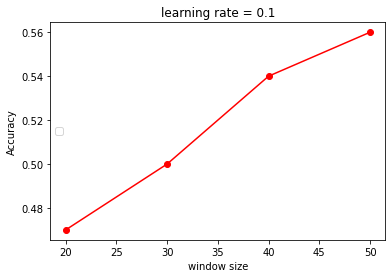

In [ ]:
#learning rate = 0.1
first_list = np.array([0.47,0.50,0.54,0.56])
ax3 = plt.figure()
axis3 = np.array([20,30,40,50])
plt.errorbar(axis3,first_list,marker='o',color='red')
plt.ylabel('Accuracy')
plt.xlabel('window size')
plt.title('learning rate = 0.1')
plt.legend(loc=6)

No handles with labels found to put in legend.


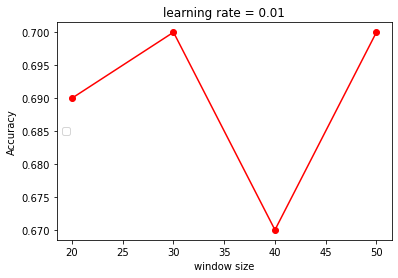

In [ ]:
#learning rate = 0.01
second_list = np.array([0.69,0.70,0.67,0.70])
ax4 = plt.figure()
axis4 = np.array([20,30,40,50])
plt.errorbar(axis4,second_list,marker='o',color='red')
plt.ylabel('Accuracy')
plt.xlabel('window size')
plt.title('learning rate = 0.01')
plt.legend(loc=6)

No handles with labels found to put in legend.


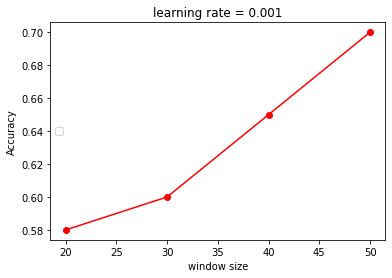

In [ ]:
#learning rate = 0.001
third_list = np.array([0.58,0.60,0.65,0.70])
ax5 = plt.figure()
axis5 = np.array([20,30,40,50])
plt.errorbar(axis5,third_list,marker='o',color='red')
plt.ylabel('Accuracy')
plt.xlabel('window size')
plt.title('learning rate = 0.001')
plt.legend(loc=6)

#5 - Test your model via Colab Form Fields User Interface

You are required to design a user interface so that user can input a textual sentence via the colab form fields user interface to get the personality type classification result from your trained model. *You can just modify based on the following Colab Form Fields template*

In [ ]:
# Please comment your code
import torch
import torch.nn as nn
import torch.nn.functional as F
#replace |||
def replace_vertical_line(x):
    x = str(x)
    x = x.replace('|||',' ')
    return x

#remove punctuation
def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]',' ',x)
    return x

#lowercase and remove numbers
def lower_remove(x):
  tokens = re.sub(r"[0-9]+", " ", x.lower())
  return tokens

#remove stop words
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
stop_words = sw.words()

def remove_stopword(sentence):
  tokens = word_tokenize(sentence)
  filtered_sentence = [w for w in tokens if not w in stop_words]
  return filtered_sentence

#TweetTokenizer
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def tknzr_token(x):
  x = tknzr.tokenize(x)
  return x

#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def stemming(x):
  singles = [stemmer.stem(plural) for plural in x]
  return singles

#Lemmatisation by NLTK Wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def Lemmatisation(x):
  singles = [lemmatizer.lemmatize(plural) for plural in x]
  return singles

def encode_and_add_padding(sentences, seq_length, word_index):
    sent_encoded = []
    for sent in sentences:
        temp_encoded = [word_index[word] if word in word_index else word_index['[UNKNOWN]'] for word in sent]
        if len(temp_encoded) < seq_length:
            temp_encoded += [word_index['[PAD]']] * (seq_length - len(temp_encoded))
        elif len(temp_encoded) > seq_length:
            temp_encoded = temp_encoded[0:seq_length]
        sent_encoded.append(temp_encoded)
    return sent_encoded

# Define the model
class Bi_LSTM_Emb(nn.Module):
    def __init__(self):
        super(Bi_LSTM_Emb, self).__init__()
        self.emb = nn.Embedding(vocab_size, emb_dim)
        # [IMPORTANT] Initialize the Embedding layer with the lookup table we created
        self.emb.weight.data.copy_(torch.from_numpy(emb_table))
        # Optional: set requires_grad = False to make this lookup table untrainable
        self.emb.weight.requires_grad = False

        self.lstm = nn.LSTM(emb_dim, n_hidden, batch_first =True, bidirectional=True)
        self.linear = nn.Linear(n_hidden*2, n_class)

    def forward(self, x):
        # Get the embeded tensor
        x = self.emb(x)
        # we will use the returned h_n of shape (num_layers * num_directions, batch, hidden_size): tensor containing the hidden state for t = seq_len.
        lstm_out, (h_n, c_n) = self.lstm(x)
        # concat the last hidden state from two direction
        hidden_out = torch.cat((h_n[0,:,:],h_n[1,:,:]),1)
        z = self.linear(hidden_out)
        return z

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#@title Personality Type Prediction
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import re
import numpy as np
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
#load model from drive
id = '1fx66oHFucOZvP4VB5CfT57d36O0nes0b'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('best_model.pt')

test_model = torch.load('best_model.pt')
test_model.eval()

text = "Do you fear a love fool who is loving you so deeply?" #@param {type:"string"}
#preprocessing
text = lower_remove(text)
text = remove_punctuation_re(text)
text = remove_stopword(text)
text = Lemmatisation(text)
text = list([text])

#create word list
word_set = set()
for sent in text:
    for word in sent:
        word_set.add(word)

word_set.add('[PAD]')
word_set.add('[UNKNOWN]')
word_list = list(word_set)

#create word index
word_index = {}
ind = 0
for word in word_list:
    word_index[word] = ind
    ind += 1

unique_labels = ["T","F"]
seq_length = 150
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

test_pad_encoded = encode_and_add_padding(text,seq_length,word_index)
input_torch = torch.from_numpy(np.array(test_pad_encoded)).to(device)
outputs = test_model(input_torch)
predicted = torch.argmax(outputs, -1)
personality = unique_labels[int(predicted)]
print("Personality Type Prediction:",personality)

Personality Type Prediction: F


# Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*

In [ ]:
# If you used OOP style, use this section